<a href="https://colab.research.google.com/github/Ajay-user/DataScience/blob/master/Regression/Quickstart/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
url = 'https://raw.githubusercontent.com/Ajay-user/DataScience/master/Regression/Datasets/Position_Salaries.csv'
df = pd.read_csv(url)
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
# features and target variables
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

Many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [ ]:
print('Shape of feature variables',X.shape)
print('Shape of target variables',y.shape)

# we are scaling the target variables also 
# scaler expects a 2D array so we have to reshape y
y = y.reshape(len(y),-1)
print('Shape of target variables after reshaping',y.shape)

Shape of feature variables (10, 1)
Shape of target variables (10,)
Shape of target variables after reshaping (10, 1)


In [ ]:
# feature scaling
scale_X = StandardScaler()
X = scale_X.fit_transform(X)

# target scaling
scale_y = StandardScaler()
y = scale_y.fit_transform(y)

In [ ]:
# model training
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

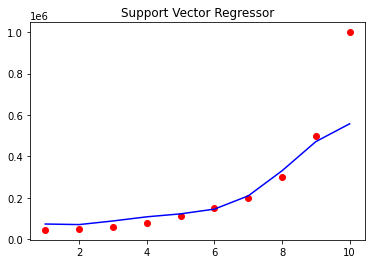

In [ ]:
# Visualize the result of training
plt.scatter(scale_X.inverse_transform(X), scale_y.inverse_transform(y), color='red')
plt.plot(scale_X.inverse_transform(X), scale_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('Support Vector Regressor')
plt.show()

## Working on Real world data

In [3]:
## Working on Real world data

url = 'https://raw.githubusercontent.com/Ajay-user/DataScience/master/Regression/Datasets/RealWorldDataForRegression.csv'
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
# check for null
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

### Feature and Target

In [8]:
# first four columns are the features and we are predicting the fifth

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Feature Scaling

In [11]:
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

y_reshaped = y.reshape(len(y),-1)
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(y_reshaped)

### Train Test split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

### Model Training

In [14]:
model = SVR()
model.fit(X_train, y_train.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Model Evaluation

In [15]:
model.score(X_test, y_test.ravel())

0.9468471107473364

### Make predictions

In [16]:
y_preds = model.predict(X_test)

In [17]:
# r2

print('R squared :',r2_score(y_test, y_preds))

R squared : 0.9468471107473364
